# ML Prac 6

## Questions

### 1. What are the main motivations for reducing a dataset’s dimensionality? Are there any drawbacks?


Reducing a dataset's dimensionality, also known as dimensionality reduction, is a common technique in data preprocessing and analysis. The main motivations for reducing a dataset's dimensionality are:

1. **Simplification**: High-dimensional data can be complex and challenging to visualize or analyze effectively. Dimensionality reduction simplifies data by reducing the number of features or variables, making it easier to work with.

2. **Improved Efficiency**: High-dimensional data requires more memory and computational resources to process. Reducing dimensionality can lead to faster training and evaluation of machine learning models, making it computationally more efficient.

3. **Overfitting Prevention**: High-dimensional datasets are more prone to overfitting, where a model captures noise rather than true patterns. Dimensionality reduction can help reduce overfitting by focusing on the most important features.

4. **Visualization**: Reducing dimensionality allows for easier visualization of data in lower-dimensional spaces (e.g., 2D or 3D), aiding in data exploration and interpretation.

5. **Feature Engineering**: Dimensionality reduction can be part of feature engineering, where redundant or irrelevant features are removed, improving model performance and interpretability.

6. **Noise Reduction**: Some dimensions in high-dimensional data may contain noise or measurement errors. Dimensionality reduction can help filter out noisy dimensions.

However, there are also drawbacks and considerations when reducing dimensionality:

1. **Information Loss**: Reducing dimensionality may lead to information loss, as some variability in the data is discarded. The challenge is to strike a balance between reducing dimensionality and retaining enough information for the task at hand.

2. Loss of Interpretability: In some cases, interpreting reduced-dimensional data can be more challenging, especially if the reduced features are not directly interpretable.

3. Algorithm Complexity: Dimensionality reduction techniques themselves can be complex and computationally intensive, depending on the method used.

4. Loss of Discriminative Power: When reducing dimensions, there's a risk of losing the ability to discriminate between classes or categories in classification tasks.

5. Non-Linear Relationships: Many dimensionality reduction techniques assume linear relationships between variables. If the data has complex non-linear relationships, these techniques may not capture them effectively.

6. Subjectivity: The choice of which dimensions to reduce and the dimensionality reduction technique used can be somewhat subjective and may impact the results.

### 2. What is PCA? What is it used for?


ChatGPT

PCA, or Principal Component Analysis, is a dimensionality reduction technique commonly used in data analysis and machine learning. Its primary purpose is to reduce the dimensionality of a dataset while preserving as much of the relevant information as possible. Here's an overview of PCA and its uses:

1. **Dimensionality Reduction**: PCA identifies and retains the most important features (principal components) of a dataset while discarding the less informative ones. It does this by projecting the data into a lower-dimensional space defined by these principal components.

2. **Feature Compression**: PCA can be used to compress data, which is particularly useful for reducing memory and computational requirements when working with large datasets.

3. **Visualization**: PCA helps in visualizing high-dimensional data in lower-dimensional spaces (e.g., 2D or 3D plots) to gain insights into data structure and relationships.

4. **Noise Reduction**: By focusing on the most significant features, PCA can help reduce the impact of noise and measurement errors in data.

5. **Data Preprocessing**: PCA is often used as a preprocessing step in machine learning pipelines to reduce the curse of dimensionality and improve model performance.

6. **Feature Engineering**: PCA can be part of feature engineering, where it transforms original features into a smaller set of uncorrelated features that are more suitable for modeling.

7. **Image Compression**: PCA is used in image compression techniques to reduce the storage and transmission requirements of images while preserving essential visual information.

8. **Anomaly Detection**: PCA can be applied in anomaly detection by reconstructing data points from their lower-dimensional representations. Anomalies may stand out in the reconstruction error.

PCA works by finding linear combinations of the original features (principal components) in such a way that the first principal component explains the most variance in the data, the second principal component explains the second most, and so on. These principal components are orthogonal (uncorrelated), making them useful for data reduction.

### 3. In what case would you use Incremental PCA?

Incremental PCA (IPCA) is a variant of Principal Component Analysis (PCA) designed for working with large datasets that may not fit into memory. It allows you to perform dimensionality reduction on such datasets in a memory-efficient way by processing data in smaller chunks or batches. IPCA is particularly useful in the following cases:

1. **Large Datasets**: When dealing with extremely large datasets that cannot be loaded into memory all at once, IPCA enables you to perform PCA in a streaming or batched manner, processing smaller chunks of data at a time.

2. **Limited Memory**: In situations where memory resources are constrained, IPCA can be used to work with data that would otherwise cause memory overflow if traditional PCA were employed.

3. **Online Learning**: In applications where new data arrives continuously over time (e.g., online learning scenarios), IPCA can be employed to update the PCA model incrementally as new data becomes available without having to recompute the entire PCA on the entire dataset.

4. **Out-of-Core Processing**: When your dataset is too large to fit into memory but is stored on disk, IPCA can read and process chunks of data from disk sequentially, allowing you to perform PCA on datasets that exceed the available memory.

5. **Parallel Processing**: IPCA can be parallelized, distributing the processing of data chunks across multiple processing units or nodes, which can significantly speed up dimensionality reduction for large datasets.

6.  **Real-time Analysis**: In cases where real-time analysis is required, IPCA allows you to continuously update the PCA model as new data arrives, making it suitable for applications like real-time monitoring and anomaly detection.

7. **Reducing Preprocessing Overheads**: IPCA can help reduce the preprocessing time and memory consumption, allowing you to focus on modeling and analysis, especially when dimensionality reduction is part of a larger machine learning pipeline.

## Lab Practice

Download, open and run the program tut06.py. Read and understand the program.


### 1) Understand each figure plotted


In [64]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

x1 = 2 * np.random.rand(100, 1)               # generate linear random data
x2 = 4 + 4 * x1 + np.random.randn(100, 1)
x3 = x1**2 + x2**2                            

X = np.c_[x1, x2, x3] # concatenate and create a 3D array

X_centered = X - X.mean(axis=0)               # centre the data for PCA

U, s, V = np.linalg.svd(X_centered)           # conduct SVD and
c1 = V.T[:, 0]                                # get PC1
c2 = V.T[:, 1]                                # get PC2

############ projection

W2 = V.T[:, :2]                               # weights in 2D
X2D = X_centered.dot(W2)	                  # new 2D representation of the data

#########################
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X2D = pca.fit_transform(X)

pca.explained_variance_ratio_

# The first PC explains 99% of the data

array([9.99881458e-01, 8.59971289e-05])

### MNIST

In [65]:
from sklearn.datasets import fetch_openml                  # MNIST dataset
from sklearn.model_selection import train_test_split       # training/test split

mnist = fetch_openml('mnist_784', version=1, as_frame=False, parser = 'auto')
mnist.target = mnist.target.astype(np.uint8)

# assign to variables
X = mnist["data"]
y = mnist["target"]

# split the data (80train/20test) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

pca = PCA()                # initialise PCA
pca.fit(X_train)           # train the model using .fit

cumsum = np.cumsum(pca.explained_variance_ratio_)       # calculate the cumulative sum of proportion of variance explained
d = np.argmax(cumsum >= 0.95) + 1                       # find the index of where 95% of the data is explained by the model
print("d =", d)                                          # index = number of features, in this case 154 "components"

# Re-train using known number of features 
pca = PCA(n_components=d)
X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)

d = 154


In [66]:
################################################use n_components 
# second way to find the optimal d, n_components=0.95
###################

pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)
pca.n_components_
#154
np.sum(pca.explained_variance_ratio_)
#0.950373730459223

0.9503615104188744

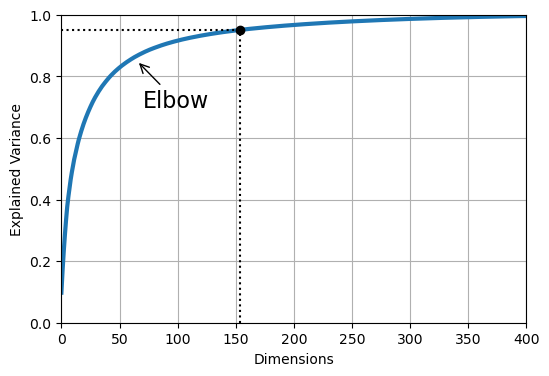

In [67]:
####################################plot d vs explained variance
##########3rd way to find the optimal d

plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 400, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")            # vertical dotted line
plt.plot([0, d], [0.95, 0.95], "k:")         # horizontal dotted line
plt.plot(d, 0.95, "ko")                      # dot on d
plt.annotate("Elbow", xy=(65, 0.85), xytext=(70, 0.7),
             arrowprops=dict(arrowstyle="->"), fontsize=16)
plt.grid(True)

plt.show()

Text(0.5, 1.0, 'Compressed')

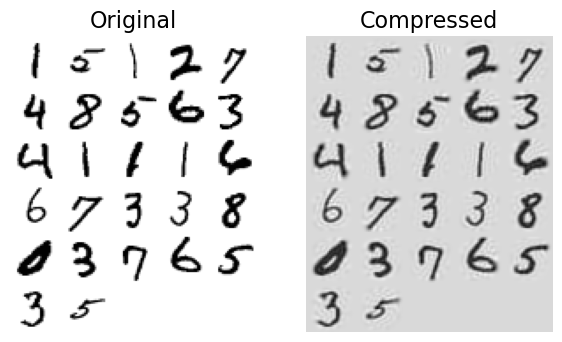

In [68]:
##############################compression and plot

def plot_digits(instances, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    # This is equivalent to n_rows = ceil(len(instances) / images_per_row):
    n_rows = (len(instances) - 1) // images_per_row + 1

    # Append empty images to fill the end of the grid, if needed:
    n_empty = n_rows * images_per_row - len(instances)
    padded_instances = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)

    # Reshape the array so it's organized as a grid containing 28×28 images:
    image_grid = padded_instances.reshape((n_rows, images_per_row, size, size))

    # Combine axes 0 and 2 (vertical image grid axis, and vertical image axis),
    # and axes 1 and 3 (horizontal axes). We first need to move the axes that we
    # want to combine next to each other, using transpose(), and only then we
    # can reshape:
    big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * size,
                                                         images_per_row * size)
    # Now that we have a big image, we just need to show it:
    plt.imshow(big_image, cmap = mpl.cm.binary, **options)
    plt.axis("off")
    
plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(X_train[::2100])
plt.title("Original", fontsize=16)

plt.subplot(122)
plot_digits(X_recovered[::2100])
plt.title("Compressed", fontsize=16)

### 2) Change the minimum total variance ratio to preserve to 85%, what is the new dimension? Compare the figures with the 95% case


In [69]:
pca = PCA()                # initialise PCA
pca.fit(X_train)           # train the model using .fit

cumsum = np.cumsum(pca.explained_variance_ratio_)       # calculate the cumulative sum of proportion of variance explained
d = np.argmax(cumsum >= 0.85) + 1                       # find the index of where 85% of the data is explained by the model
print("d =", d)      

d = 59


**A**: The new dimension has been reduced to 59 features

Text(0.5, 1.0, 'Compressed')

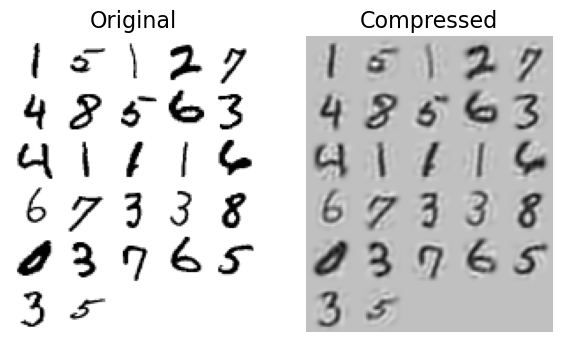

In [70]:
# Retrain with 59 features and plot the compression
pca = PCA(n_components=d)
X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)

plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(X_train[::2100])
plt.title("Original", fontsize=16)

plt.subplot(122)
plot_digits(X_recovered[::2100])
plt.title("Compressed", fontsize=16)

### 3) Change the minimum total variance ratio to preserve to 98%, what is the new dimension? Compare the figures with the previous two cases


In [71]:
pca = PCA()                # initialise PCA
pca.fit(X_train)           # train the model using .fit

cumsum = np.cumsum(pca.explained_variance_ratio_)       # calculate the cumulative sum of proportion of variance explained
d = np.argmax(cumsum >= 0.98) + 1                       # find the index of where 98% of the data is explained by the model
print("d =", d)      

d = 260


**A**: The features have increased to 260 features

Text(0.5, 1.0, 'Compressed')

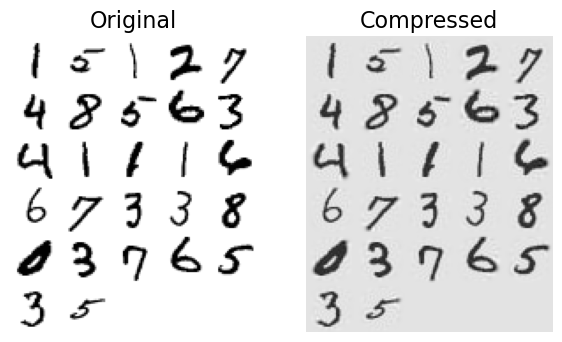

In [72]:
# Retrain with 260 features and plot the compression
pca = PCA(n_components=d)
X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)

plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(X_train[::2100])
plt.title("Original", fontsize=16)

plt.subplot(122)
plot_digits(X_recovered[::2100])
plt.title("Compressed", fontsize=16)

### 4) Add another way to reduce the dimension, based on the variance to preserve, by directly initialising the PCA() object. (using the n components variable)


In [77]:
################################################use n_components 
# second way to find the optimal d, n_components=0.95

pca = PCA(n_components=0.99)
X_reduced = pca.fit_transform(X_train)
print(pca.n_components_)
#331
np.sum(pca.explained_variance_ratio_)
#0.950373730459223

331


0.9900679476611307

### 5) Suppose you want to reduce the number of dimension to 100, what is the overall preserving variance ratio?

In [78]:
# Train the model using 100 features 
pca = PCA(n_components =100)
X_reduced = pca.fit_transform(X_train)
np.sum(pca.explained_variance_ratio_)           # overall preserving variance ratio

0.91456514542574

**A**: Only preserves 91% of the variance